In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('vdoe_kpi_combined_2015_2020.csv')
df.head()

,student_totals_seniors_x,specific_interactions_1-on-1s_total,specific_interactions_group_total,specific_interactions_1-on-1s_at_least_one,specific_interactions_group_at_least_one,specific_interactions_parent_meetings,specific_interactions_parent_meetings_at_least_one,total_interactions_met_with_1_plus_times_(group_and_1_1),total_interactions_met_with_3_plus_times_(group_and_1_1),total_interactions_met_with_5_plus_times_(group_and_1_1),...,total_white,enrolled_white,total_two,enrolled_two,econ_total,econ_enrolled,lep_total,lep_enrolled,disabilities_total,disabilities_enrolled
0,137.0,1073.0,438.0,123.0,116.0,33.0,25.0,131.0,115.0,90.0,...,37.0,27.0,NaN,NaN,74.0,44.0,NaN,NaN,17.0,11.0
1,263.0,801.0,638.0,261.0,246.0,262.0,136.0,261.0,233.0,161.0,...,175.0,116.0,NaN,NaN,141.0,87.0,NaN,NaN,23.0,10.0
2,122.0,501.0,215.0,112.0,86.0,48.0,35.0,113.0,89.0,57.0,...,48.0,20.0,NaN,NaN,47.0,19.0,NaN,NaN,NaN,NaN
3,153.0,192.0,373.0,122.0,134.0,16.0,14.0,142.0,111.0,38.0,...,107.0,85.0,NaN,NaN,47.0,26.0,NaN,NaN,NaN,NaN
4,267.0,1606.0,1196.0,267.0,253.0,163.0,91.0,267.0,250.0,210.0,...,208.0,141.0,20,12,56.0,24.0,NaN,NaN,24.0,9.0


In [5]:
column_names = df.columns
column_names_df = pd.DataFrame({'features':column_names})
display(column_names_df)

,features
0,student_totals_seniors_x
1,specific_interactions_1-on-1s_total
2,specific_interactions_group_total
3,specific_interactions_1-on-1s_at_least_one
4,specific_interactions_group_at_least_one
5,specific_interactions_parent_meetings
6,specific_interactions_parent_meetings_at_least...
7,total_interactions_met_with_1_plus_times_(grou...
8,total_interactions_met_with_3_plus_times_(grou...
9,total_interactions_met_with_5_plus_times_(grou...


In [6]:
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f'Corr: {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

def create_pairs_plot(df, variables):
    """
    Create a pairs plot of the given variables.
    
    Args:
    df: DataFrame
    variables: list of variable names to include in the plot from the DataFrame
    """
    g = sns.PairGrid(df[variables])
    g.map_lower(sns.scatterplot)
    g.map_upper(corr_func)
    g.map_diag(sns.histplot)
    plt.show()

In [7]:
def plot_scatter(df, x_var, y_var):
    # generate a docstring
    """
    Create a scatter plot with a regression line and highlights outliers.
    
    Args:
    df: The input dataframe that contains the data
    x_var: The name of the x variable
    y_var: The name of the y variable
    return: A scatter plot with a regression line and highlighted outliers
    """
    
    # Calculate Z-scores
    df['Z_x'] = np.abs(zscore(df[x_var]))
    df['Z_y'] = np.abs(zscore(df[y_var]))

    # Create a scatter plot with a regression line
    sns.regplot(x=x_var, y=y_var, data=df, color='blue', line_kws={'color': 'black'})

    # Highlight outliers
    outliers = df[(df['Z_x'] > 3) | (df['Z_y'] > 3)]
    plt.scatter(outliers[x_var], outliers[y_var], color='red', label='Outliers')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.show()

    # Print the correlation
    print("Correlation: ", df[x_var].corr(df[y_var]))

In [8]:
def create_boxplot(df, x_var, y_var):
    """Create a boxplot of y_var by x_var.

    Args:
    df (DataFrame): The input DataFrame
    x_var (str): The column name of the x variable
    y_var (str): The column name of the y variable
    """
    sns.boxplot(x=x_var, y=y_var, data=df, palette='Set1')
    plt.title(f'{y_var} by {x_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.xticks(rotation=45)
    plt.show()

What is the effect on 2- and 4-year postsecondary enrollment rates with the intervention of a VCAC college adviser? 

Are there significant effects on sub-populations including these categories tracked by VDOE: Female, Male, Black, Hispanic, White, 2 or More Races, Economically Disadvantaged, Students with Disabilities? 

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

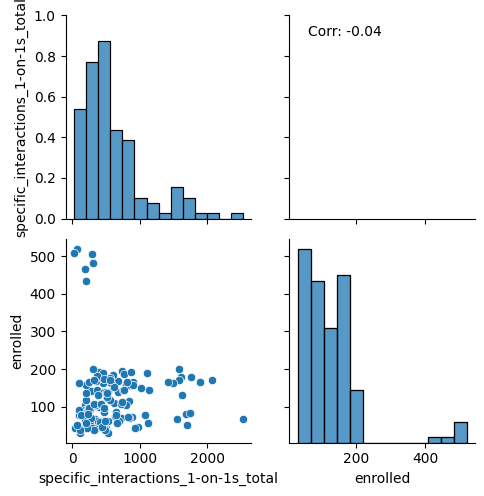

In [10]:
intervention_plot = create_pairs_plot(df, ['specific_interactions_1-on-1s_total', 'enrolled']) 

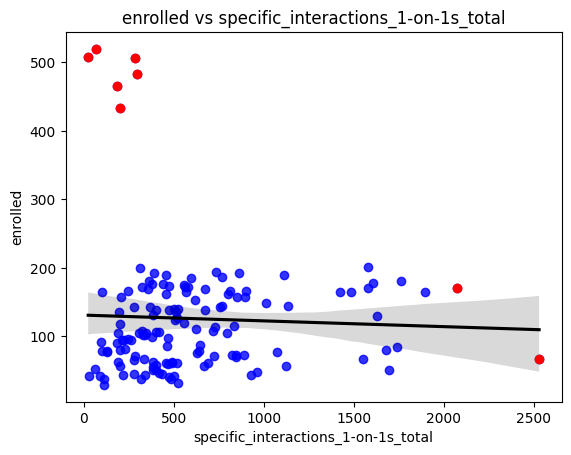

Correlation:  -0.04275036815792119


In [36]:
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'enrolled')

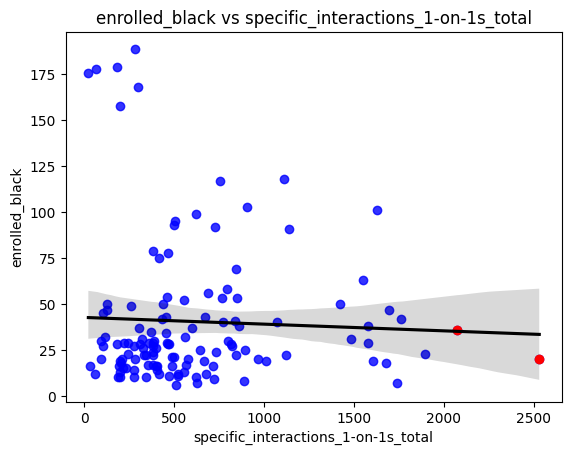

Correlation:  -0.045226360117953196


In [35]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'enrolled_black')

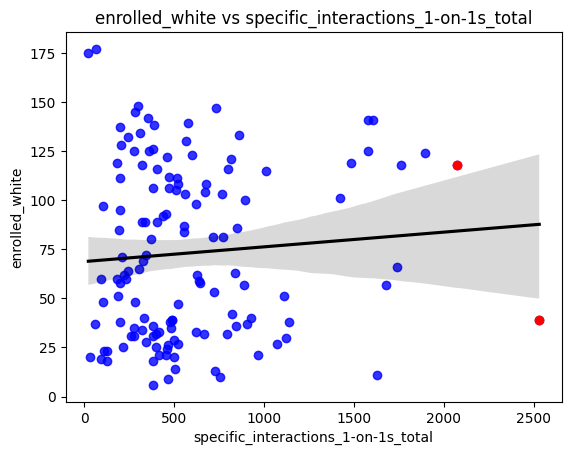

Correlation:  0.0785551729822827


In [15]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'enrolled_white')

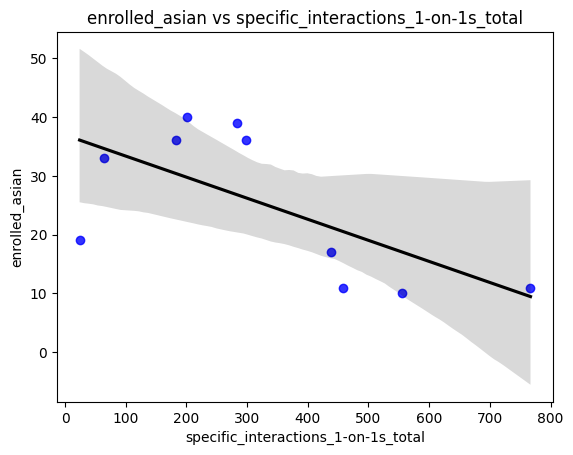

Correlation:  -0.6491271792811183


In [16]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'enrolled_asian')

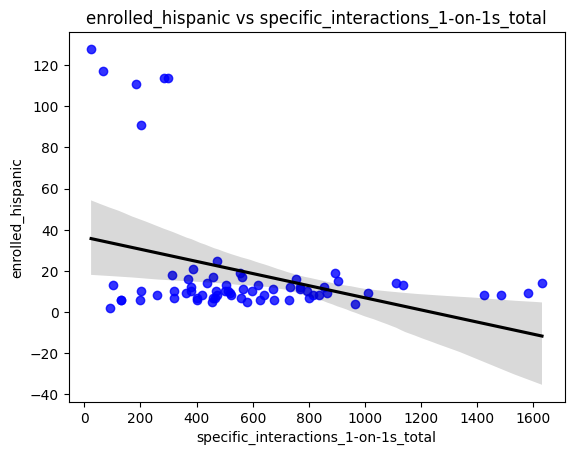

Correlation:  -0.3489429737514414


In [18]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'enrolled_hispanic')

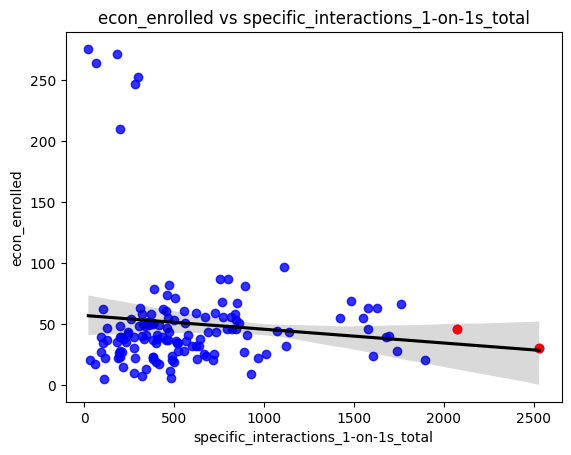

Correlation:  -0.11111344025439807


In [19]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'econ_enrolled')

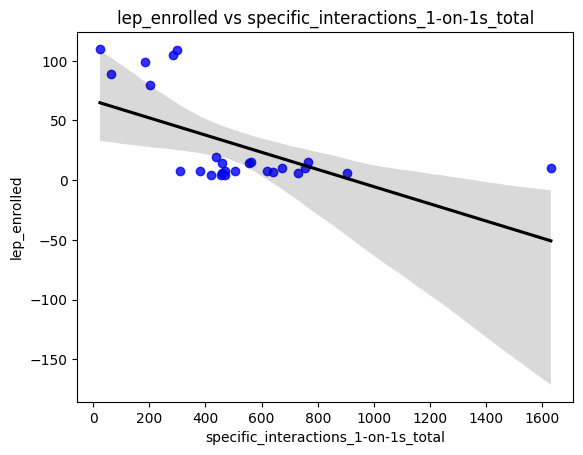

Correlation:  -0.5789988789717916


In [20]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'lep_enrolled')

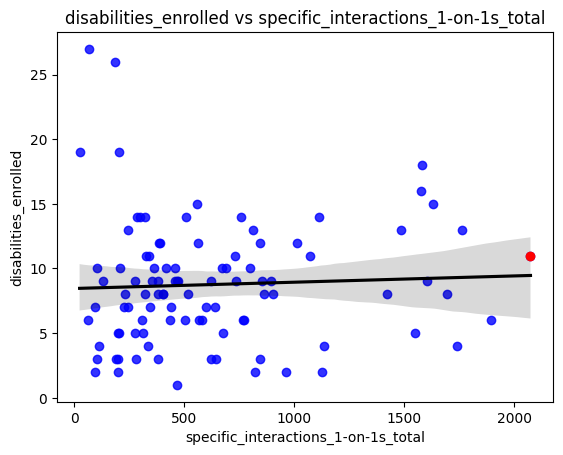

Correlation:  0.04844364759023859


In [21]:
#note: we have no way of knowing whether the one-on-one interactions were with students of color
plot_scatter(df, 'specific_interactions_1-on-1s_total', 'disabilities_enrolled')

What is the relationship between certain college adviser activities (as measured by KPI output data) and postsecondary enrollment rates at each partner high school? 

Are some activities better predictors of an increase in postsecondary enrollment? 

In [38]:
df2 = df.groupby('school_name')

In [40]:
df2.head()

,student_totals_seniors_x,specific_interactions_1-on-1s_total,specific_interactions_group_total,specific_interactions_1-on-1s_at_least_one,specific_interactions_group_at_least_one,specific_interactions_parent_meetings,specific_interactions_parent_meetings_at_least_one,total_interactions_met_with_1_plus_times_(group_and_1_1),total_interactions_met_with_3_plus_times_(group_and_1_1),total_interactions_met_with_5_plus_times_(group_and_1_1),...,total_two,enrolled_two,econ_total,econ_enrolled,lep_total,lep_enrolled,disabilities_total,disabilities_enrolled,Z_x,Z_y
0,137.0,1073.0,438.0,123.0,116.0,33.0,25.0,131.0,115.0,90.0,...,NaN,NaN,74.0,44.0,NaN,NaN,17.0,11.0,1.025526,0.535639
1,263.0,801.0,638.0,261.0,246.0,262.0,136.0,261.0,233.0,161.0,...,NaN,NaN,141.0,87.0,NaN,NaN,23.0,10.0,0.436885,0.386965
2,122.0,501.0,215.0,112.0,86.0,48.0,35.0,113.0,89.0,57.0,...,NaN,NaN,47.0,19.0,NaN,NaN,NaN,NaN,0.212350,0.920057
3,153.0,192.0,373.0,122.0,134.0,16.0,14.0,142.0,111.0,38.0,...,NaN,NaN,47.0,26.0,NaN,NaN,NaN,NaN,0.881063,0.228104
4,267.0,1606.0,1196.0,267.0,253.0,163.0,91.0,267.0,250.0,210.0,...,20,12,56.0,24.0,NaN,NaN,24.0,9.0,2.179001,0.573683
5,356.0,1577.0,619.0,256.0,308.0,269.0,110.0,336.0,220.0,150.0,...,25,15,105.0,46.0,NaN,NaN,35.0,16.0,2.116242,0.485815
6,185.0,676.0,246.0,162.0,161.0,192.0,90.0,175.0,139.0,79.0,...,11,7,50.0,24.0,NaN,NaN,11.0,5.0,0.166371,0.134347
7,138.0,307.0,465.0,126.0,123.0,50.0,38.0,128.0,123.0,100.0,...,NaN,NaN,81.0,48.0,NaN,NaN,13.0,6.0,0.632189,0.239087
8,367.0,579.0,243.0,199.0,144.0,64.0,52.0,254.0,120.0,49.0,...,12,7,96.0,41.0,NaN,NaN,28.0,6.0,0.043549,0.507782
9,82.0,476.0,232.0,77.0,78.0,35.0,21.0,79.0,76.0,64.0,...,NaN,NaN,19.0,11.0,NaN,NaN,NaN,NaN,0.266453,0.942024


In [42]:
df2.get_group('Charlottesville High School')

,student_totals_seniors_x,specific_interactions_1-on-1s_total,specific_interactions_group_total,specific_interactions_1-on-1s_at_least_one,specific_interactions_group_at_least_one,specific_interactions_parent_meetings,specific_interactions_parent_meetings_at_least_one,total_interactions_met_with_1_plus_times_(group_and_1_1),total_interactions_met_with_3_plus_times_(group_and_1_1),total_interactions_met_with_5_plus_times_(group_and_1_1),...,total_two,enrolled_two,econ_total,econ_enrolled,lep_total,lep_enrolled,disabilities_total,disabilities_enrolled,Z_x,Z_y
19,224.0,673.0,468.0,172.0,208.0,115.0,73.0,212.0,132.0,80.0,...,NaN,NaN,93.0,56.0,13.0,10.0,20.0,10.0,0.159878,0.474832
42,286.0,458.0,853.0,179.0,247.0,30.0,23.0,252.0,204.0,110.0,...,11,8,95.0,61.0,18.0,14.0,15.0,10.0,0.305407,0.397948
65,254.0,767.0,334.0,222.0,171.0,49.0,40.0,222.0,172.0,92.0,...,10,8,112.0,68.0,24.0,15.0,21.0,6.0,0.363305,0.672533
88,269.0,438.0,504.0,150.0,259.0,42.0,34.0,263.0,105.0,68.0,...,xxxx,xxxx,96.0,62.0,25.0,19.0,16.0,7.0,0.348690,0.562699
111,277.0,556.0,83.0,204.0,59.0,133.0,79.0,204.0,79.0,37.0,...,11,7,101.0,61.0,21.0,14.0,29.0,15.0,0.093324,0.540732
134,256.0,563.0,52.0,192.0,135.0,64.0,37.0,195.0,96.0,57.0,...,20,13,108.0,51.0,22.0,15.0,24.0,12.0,0.078175,0.507782
